## 2. Data Conversion from Non stationarty to stationary


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

In [ ]:
np.random.seed(42)
n=100
data=np.cumsum(np.random.normal(size=n))

time_series=pd.Series(data)

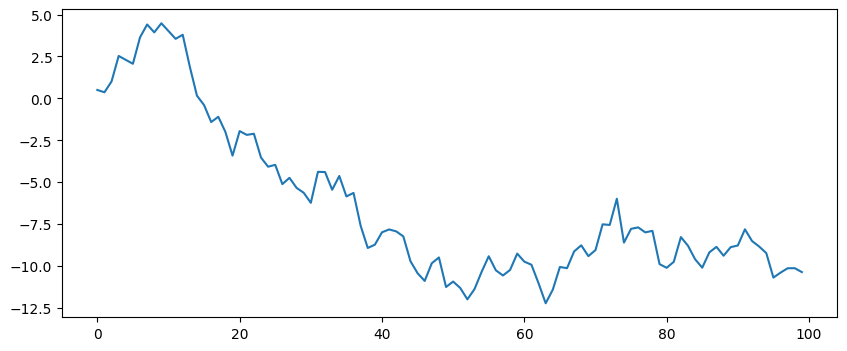

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(time_series)

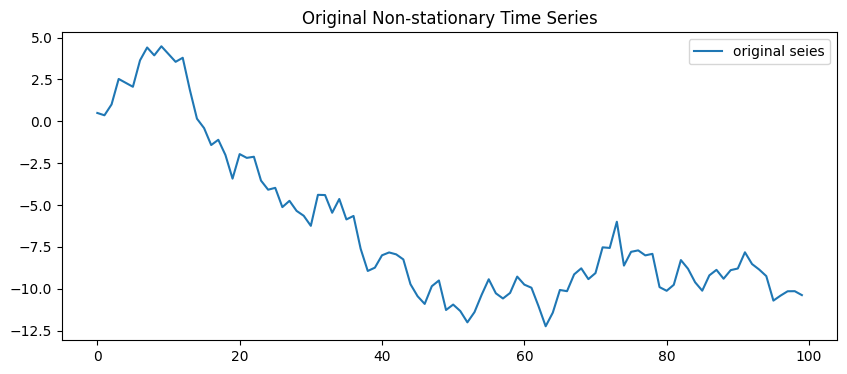

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(time_series,label='original seies')
plt.title("Original Non-stationary Time Series")
plt.legend()

### Differencing

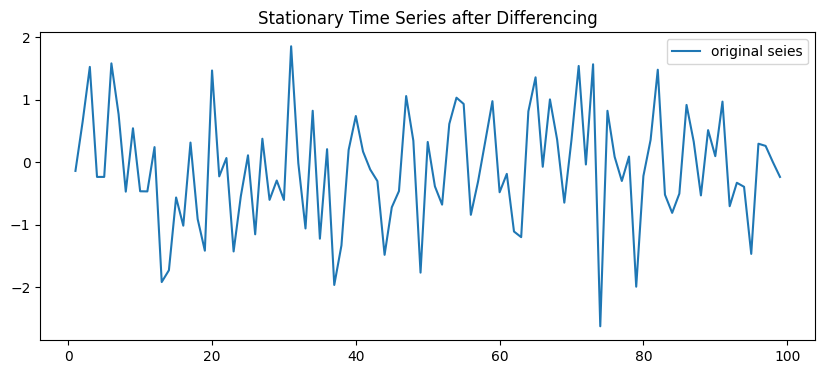

In [ ]:
diff_series = time_series.diff().dropna()
plt.figure(figsize=(10,4))
plt.plot(diff_series,label='original seies')
plt.title("Stationary Time Series after Differencing")
plt.legend()

In [ ]:
def adf_test(series):
    result = adfuller(series)
    print("ADF statistic : ",result[0])
    print("P-value : ",result[1])
    print("Critical values : ")
    for i, value in result[4].items():
        print(f" {i}:{value}")
    if result[1] <=0.05:
        print("The Time Series is Stationary")
    else:
        print("The Time Series is Not Stationary")


print("ADF Test for Original Series : ")
adf_test(time_series)

print("\nADF Test for Differenced Series : ")
adf_test(diff_series)

ADF Test for Original Series : 
ADF statistic :  -1.3583317659818992
P-value :  0.6020814791099098
Critical values : 
 1%:-3.498198082189098
 5%:-2.891208211860468
 10%:-2.5825959973472097
The Time Series is Not Stationary

ADF Test for Differenced Series : 
ADF statistic :  -10.008881137130237
P-value :  1.800687720719554e-17
Critical values : 
 1%:-3.4989097606014496
 5%:-2.891516256916761
 10%:-2.5827604414827157
The Time Series is Stationary


## Moving Average

In [ ]:
ts=pd.DataFrame(data)
ts1=pd.DataFrame()
ts1['Moving Average']=ts[0].rolling(window=3).mean()
ts2 =ts1.dropna()
ts2

,Moving Average
2,0.620434
3,1.297919
4,1.943441
5,2.295020
6,2.665328
...,...
95,-9.605974
96,-10.125809
97,-10.427922
98,-10.240492


In [ ]:
print("\nADF Test for Moving avg Series : ")
adf_test(ts2)


ADF Test for Moving avg Series : 
ADF statistic :  -3.3090547721319985
P-value :  0.014478545856427731
Critical values : 
 1%:-3.506057133647011
 5%:-2.8946066061911946
 10%:-2.5844100201994697
The Time Series is Stationary


## Log transformation

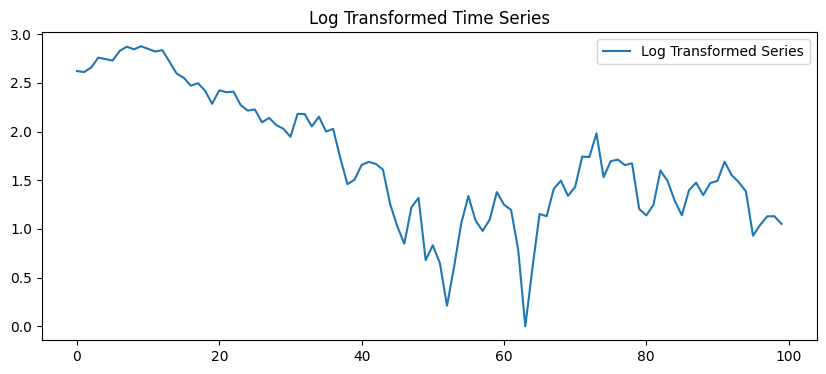


ADF Test for Log Transformed Series:
ADF statistic :  -1.9480362681443382
P-value :  0.3098114260175716
Critical values : 
 1%:-3.5078527246648834
 5%:-2.895382030636155
 10%:-2.584823877658872
The Time Series is Not Stationary


In [ ]:

log_series = np.log(time_series - time_series.min() + 1)


plt.figure(figsize=(10, 4))
plt.plot(log_series, label='Log Transformed Series')
plt.title("Log Transformed Time Series")
plt.legend()
plt.show()

# ADF Test for Log Transformed Series
print("\nADF Test for Log Transformed Series:")
adf_test(log_series)

## Decompostion

<Figure size 1200x800 with 0 Axes>

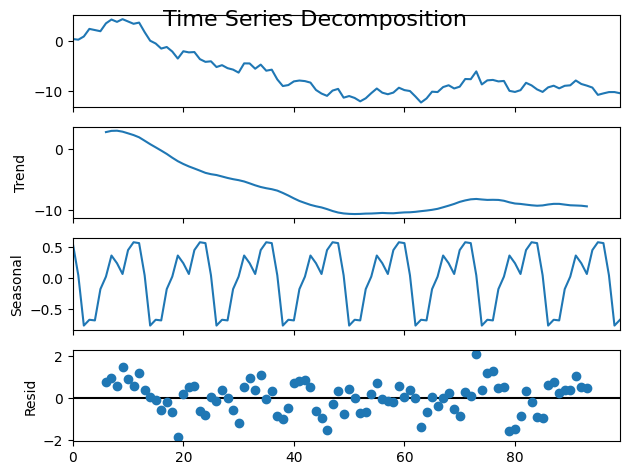

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_result = seasonal_decompose(time_series, model='additive', period=12)

# Plot the decomposed components
plt.figure(figsize=(12, 8))
decompose_result.plot()
plt.suptitle("Time Series Decomposition", fontsize=16)
plt.show()



In [ ]:
# ADF Test for Decomposed Components
print("ADF Test for Trend Component:")
adf_test(decompose_result.trend.dropna())

print("ADF Test for Seasonal Component:")
adf_test(decompose_result.seasonal.dropna())

print("ADF Test for Residual Component:")
adf_test(decompose_result.resid.dropna())

ADF Test for Trend Component:
ADF statistic :  -2.2496796741621172
P-value :  0.18871089360316617
Critical values : 
 1%:-3.5148692050781247
 5%:-2.8984085156250003
 10%:-2.58643890625
The Time Series is Not Stationary
ADF Test for Seasonal Component:
ADF statistic :  -2860392940333628.0
P-value :  0.0
Critical values : 
 1%:-3.5078527246648834
 5%:-2.895382030636155
 10%:-2.584823877658872
The Time Series is Stationary
ADF Test for Residual Component:
ADF statistic :  -5.746690227857406
P-value :  6.098281410491665e-07
Critical values : 
 1%:-3.5078527246648834
 5%:-2.895382030636155
 10%:-2.584823877658872
The Time Series is Stationary


## Box cox

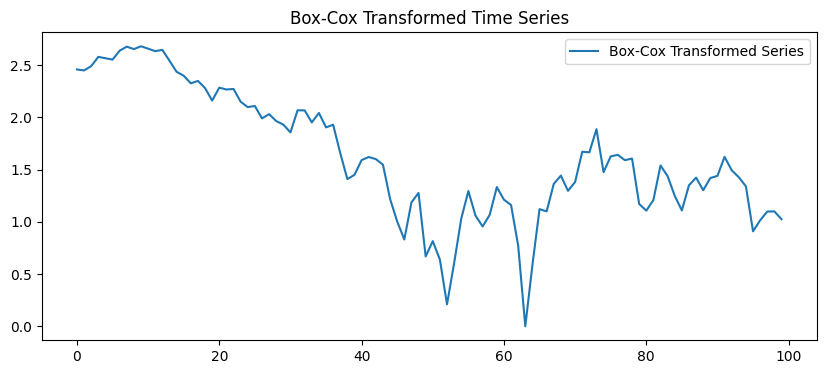

Box-Cox Transformation Lambda Value: -0.049730018206142916
ADF Test for Box-Cox Transformed Series:
ADF statistic :  -1.8977612969068571
P-value :  0.333114999146054
Critical values : 
 1%:-3.5078527246648834
 5%:-2.895382030636155
 10%:-2.584823877658872
The Time Series is Not Stationary


In [ ]:
from scipy.stats import boxcox
# only +ve
time_series_positive = time_series - time_series.min() + 1

boxcox_transformed, lambda_value = boxcox(time_series_positive)

plt.figure(figsize=(10, 4))
plt.plot(boxcox_transformed, label='Box-Cox Transformed Series')
plt.title("Box-Cox Transformed Time Series")
plt.legend()
plt.show()

# Display the lambda value
print(f"Box-Cox Transformation Lambda Value: {lambda_value}")

# ADF Test for Box-Cox Transformed Series
print("ADF Test for Box-Cox Transformed Series:")
adf_test(boxcox_transformed)